# <center> Streaming Platform Analyse</center>

**Contexte** :


**Objectifs** :

---

### Plan :




---

## Netflix - Movies and TV Shows
---

**Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.**


Netflix Dataset contains 12 columns:

    1. show_id: Unique ID for every Movie / Tv Show
    2. type: A Movie or TV Show
    3. title: Title of the Movie / Tv Show
    4. director: Director of the Movie
    5. cast: Actors involved in the Movie / Show
    6. country: Country where the movie / show was produced
    7. date_added: Date it was added on Netflix
    8. release_year: Actual Release year of the move / show
    9. rating: TV Rating of the movie / show
    10. duration: Total Duration - in minutes or number of seasons
    11. listed_in: Genre of the Movie/TV Show
    12. description: Summary of the Movie/TV Show



### Load dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


netflix_df = pd.read_csv('data/netflix_titles.csv')
netflix_df = netflix_df.set_index('show_id')

In [185]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Quick describe

In [4]:
# netflix_df.shape  # number of rows and features

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [186]:
netflix_df = netflix_df.set_index('show_id')

In [187]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [188]:
duplicate_rows_df = netflix_df[netflix_df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 11)


In [189]:
netflix_df.isnull().sum() # checking for Na/Null values

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

There are some null values in the `director`,  `cast`,  `countries`, `date_added`, `rating`  and `duration` variables. 

### Handle missing values

In [13]:
# !pip install missingno

<Axes: >

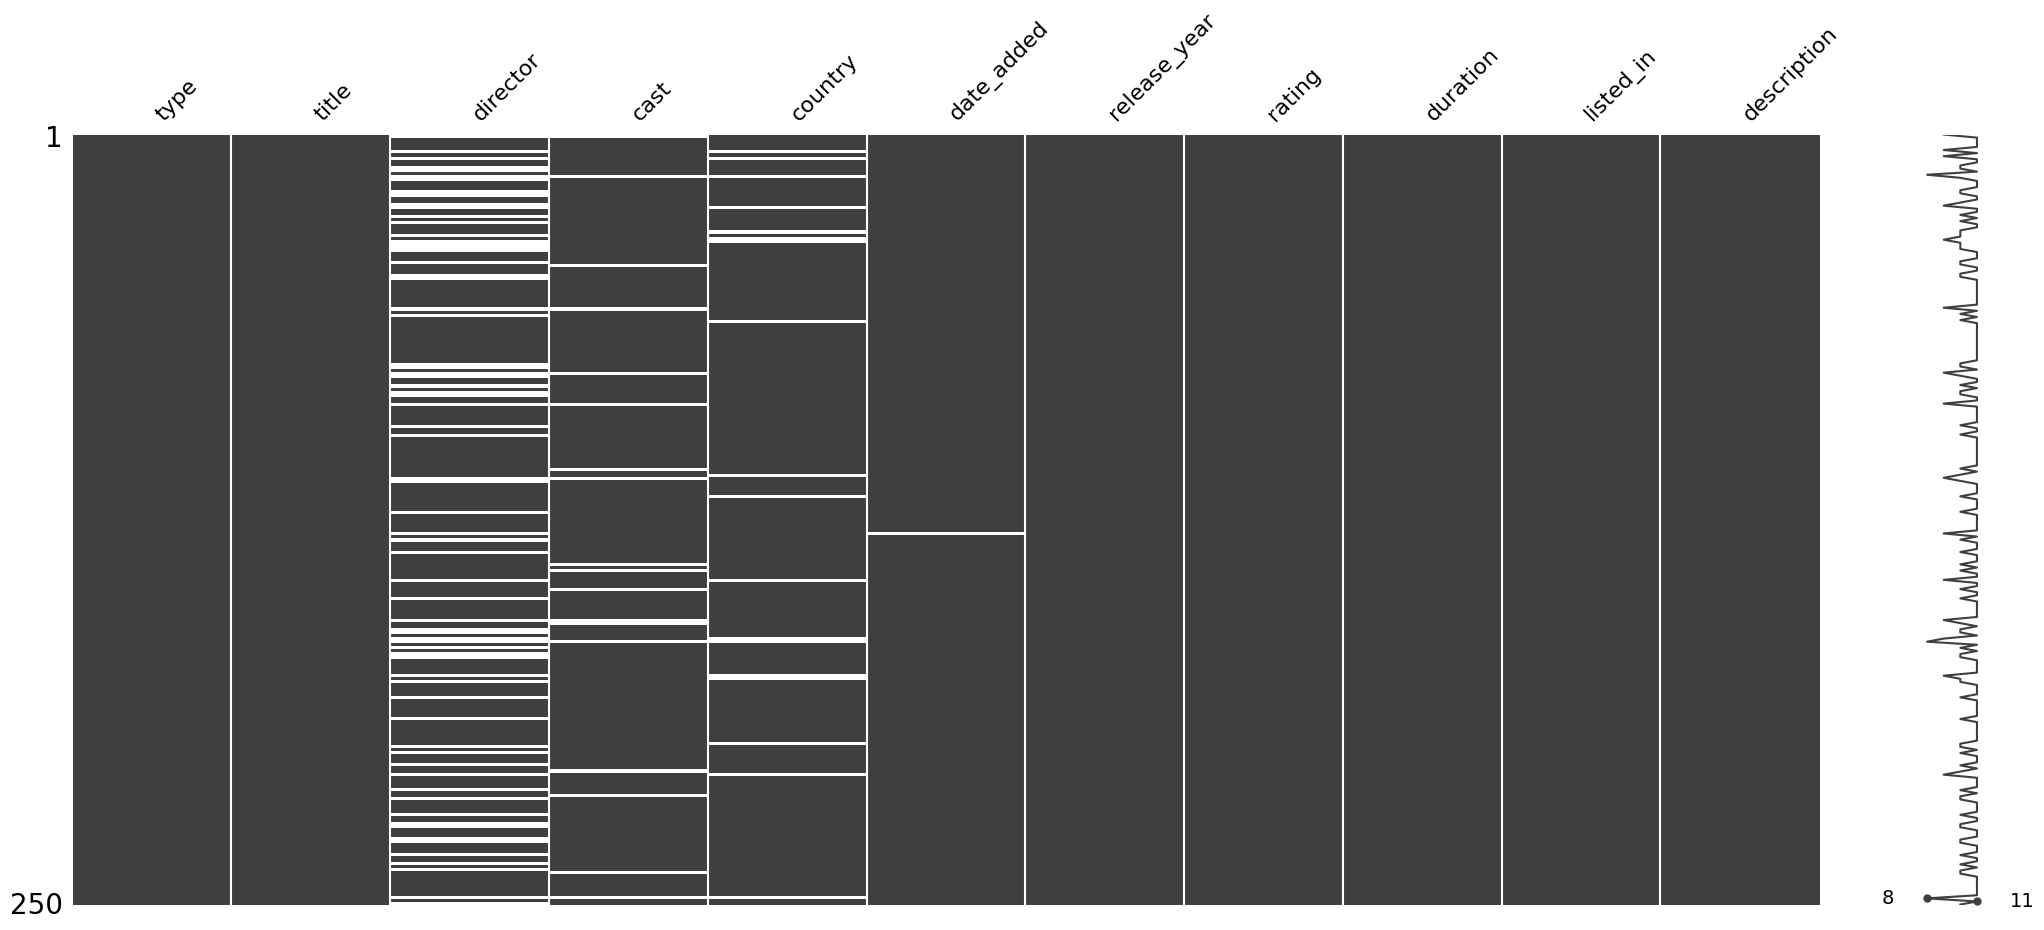

In [9]:
import missingno as msno
%matplotlib inline

msno.matrix(netflix_df.sample(250))  # on sample of 250 rows

In [18]:
# msno.matrix(netflix_df)

<Axes: >

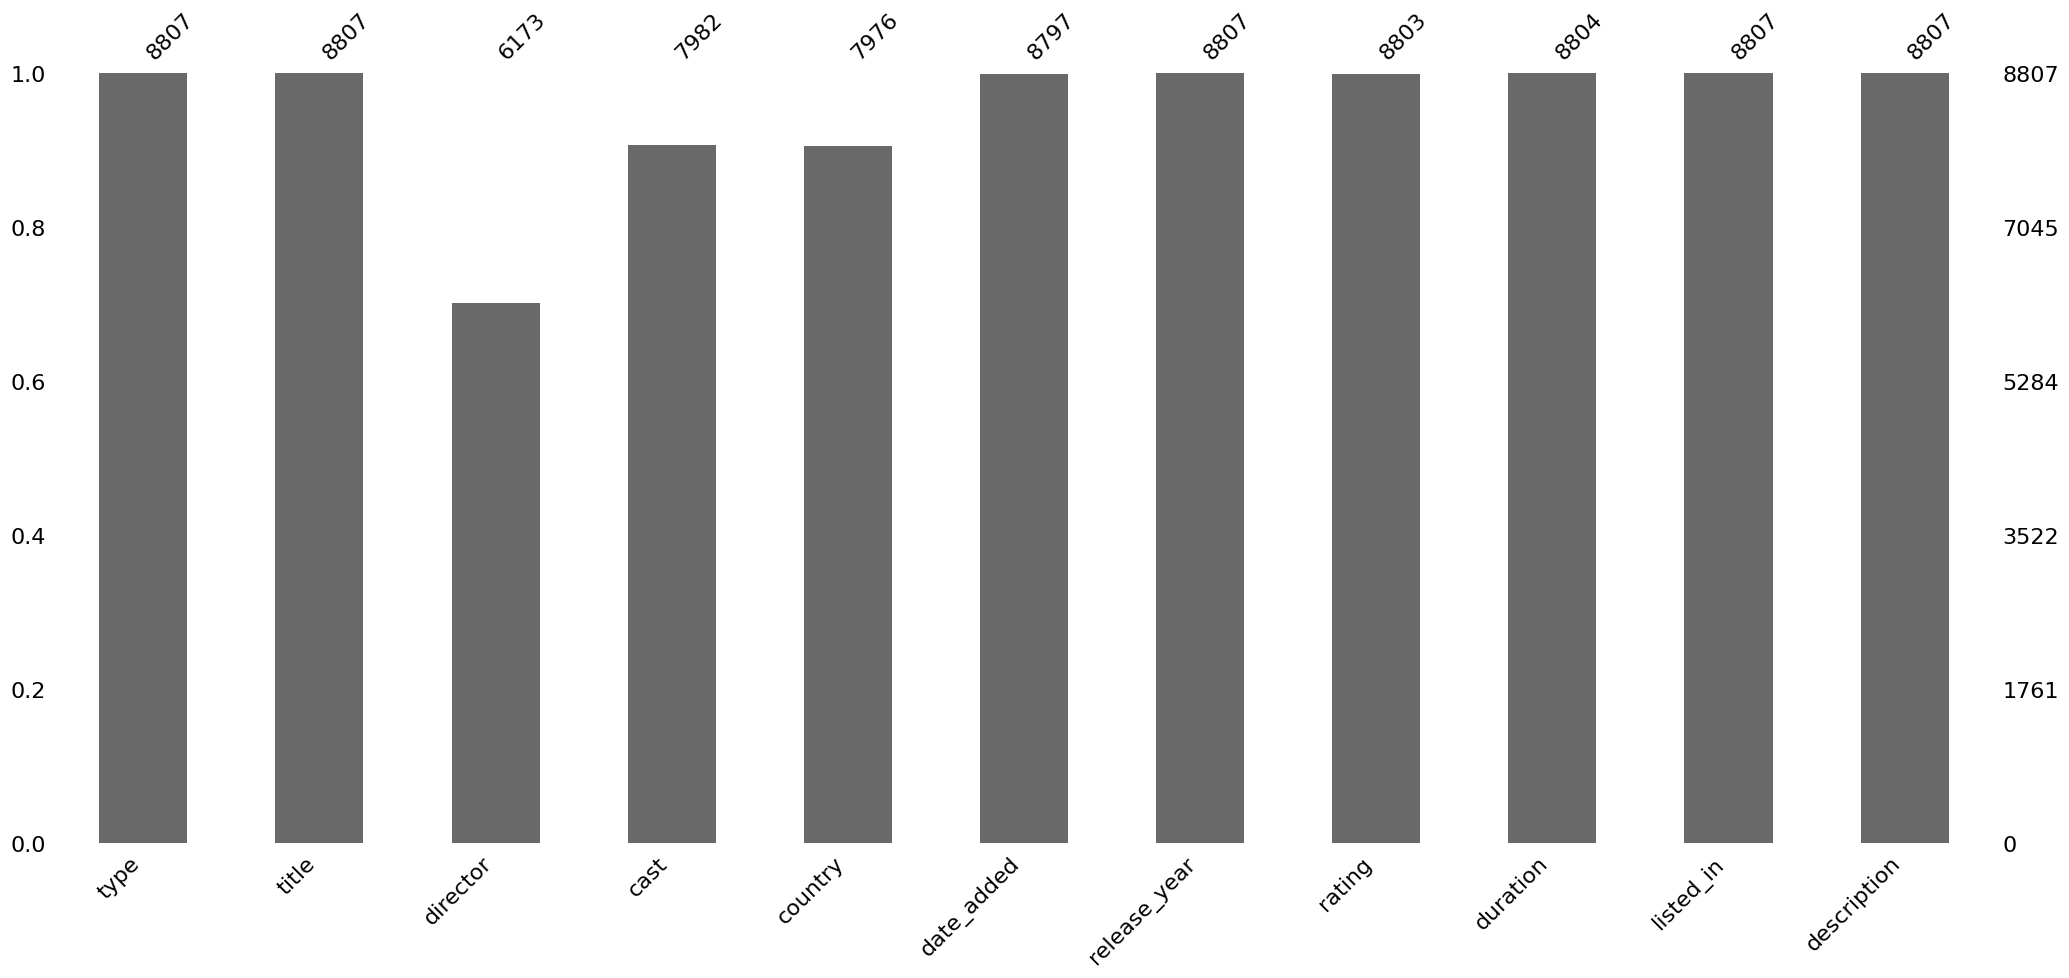

In [10]:
msno.bar(netflix_df)

In [17]:
# msno.heatmap(netflix_df)

Now, handle with missing values

- First we can DROP `cast` and `director` columns. Reason: too many null values and the choice to not give any importance to these features. **Any trouble in our case**


In [190]:
netflix_df.drop(['director','cast'],axis = 1,inplace = True)

In [191]:
netflix_df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


- There are date_added and release_year 
- We can try to complete manually Null value with data from internet

In [192]:
tmp_df = netflix_df[netflix_df['date_added'].isna()]
tmp_df

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s7197,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


In [193]:
# Try to fill null values with data scrap from internet 
# https://usa.newonnetflix.info/ 
# Problem: veracity of info and the release date are associated to Uk or Usa Netflix
# netflix_df.loc['s6067']['date_added'] = 'September 15, 2015'
netflix_df.loc[netflix_df.index =='s6067' , 'date_added'] = 'September 15, 2015'
netflix_df.loc[netflix_df.index =='s6175' , 'date_added'] = 'July 17, 2018'
netflix_df.loc[netflix_df.index =='s6796' , 'date_added'] = 'April 6, 2016'
netflix_df.loc[netflix_df.index =='s6807' , 'date_added'] = 'January 1, 2018'
netflix_df.loc[netflix_df.index =='s6902' , 'date_added'] = 'January 4, 2016'
# netflix_df.loc[netflix_df.index =='s7197' , 'date_added'] = 'September 15, 2015'
netflix_df.loc[netflix_df.index =='s7255' , 'date_added'] = 'June 1, 2015'
netflix_df.loc[netflix_df.index =='s7407' , 'date_added'] = 'January 13, 2017'
netflix_df.loc[netflix_df.index =='s7848' , 'date_added'] = 'September 15, 2014'
netflix_df.loc[netflix_df.index =='s8183' , 'date_added'] = 'September 15, 2014'

In [194]:
netflix_df[netflix_df['date_added'].isna()]

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s7197,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...


- Now only one missing row with unknown country. Can drop it.


In [195]:
netflix_df.dropna(axis=0, subset=['date_added'], inplace=True)

In [196]:
# Checking again null values status
netflix_df.isna().sum()

type              0
title             0
country         830
date_added        0
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

- What about rating null value

In [197]:
netflix_df[netflix_df['rating'].isna()]

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [198]:
netflix_df.groupby(['rating']).size().reset_index(name='count').sort_values(by='count', ascending=False)

,rating,count
11,TV-MA,3207
9,TV-14,2160
12,TV-PG,863
8,R,799
7,PG-13,490
14,TV-Y7,334
13,TV-Y,306
6,PG,287
10,TV-G,220
5,NR,80


- There three strange/incorrect values  '74 min', '84 min', '66 min'
- And there is missing Three values on duration
- After checking, these values correspond to null duration

In [199]:
netflix_df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [200]:
netflix_df[netflix_df['rating'].isin(['74 min', '84 min', '66 min'])]

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s5542,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [201]:

netflix_df.loc[netflix_df.index =='s5542' , 'duration']  = netflix_df.loc[netflix_df.index =='s5542' , 'rating'] 
netflix_df.loc[netflix_df.index =='s5795' , 'duration']  = netflix_df.loc[netflix_df.index =='s5795' , 'rating'] 
netflix_df.loc[netflix_df.index =='s5814' , 'duration']  = netflix_df.loc[netflix_df.index =='s5814' , 'rating'] 

In [202]:
netflix_df[netflix_df['rating'].isin(['74 min', '84 min', '66 min'])]

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s5542,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
s5795,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


After 

In [203]:

netflix_df.loc[netflix_df.index =='s5542' , 'rating']  = None
netflix_df.loc[netflix_df.index =='s5795' , 'rating']  = None
netflix_df.loc[netflix_df.index =='s5814' , 'rating']  = None

In [204]:
# Checking again null values status
netflix_df.isna().sum()

type              0
title             0
country         830
date_added        0
release_year      0
rating            7
duration          0
listed_in         0
description       0
dtype: int64

In [205]:
most_freq = netflix_df['rating'].mode()  # most frequent rating value
most_freq  


0    TV-MA
Name: rating, dtype: object

TV-MA --> programmes are usually created for an adult audience.

In [30]:
# netflix_df['rating'].fillna(netflix_df['rating'].mode().iloc[0], inplace=True)

In [206]:
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode().iloc[0])

In [207]:
# Checking again null values status
netflix_df.isna().sum()

type              0
title             0
country         830
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

- Can drop country col or fill it with node also

In [208]:
# netflix_df[netflix_df['country'].isna()]

# netflix_df['country'].fillna(netflix_df['country'].mode().iloc[0], inplace=True)
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode().iloc[0])

In [209]:
# Checking again null values status
netflix_df.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [226]:
netflix_df.isna().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
def cleaning(df: pd.DataFrame):
    df.drop(['director','cast'],axis = 1,inplace = True)
    
    df.loc[df.index =='s6067' , 'date_added'] = 'September 15, 2015'
    df.loc[df.index =='s6175' , 'date_added'] = 'July 17, 2018'
    df.loc[df.index =='s6796' , 'date_added'] = 'April 6, 2016'
    df.loc[df.index =='s6807' , 'date_added'] = 'January 1, 2018'
    df.loc[df.index =='s6902' , 'date_added'] = 'January 4, 2016'
    # df.loc[df.index =='s7197' , 'date_added'] = 'September 15, 2015'
    df.loc[df.index =='s7255' , 'date_added'] = 'June 1, 2015'
    df.loc[df.index =='s7407' , 'date_added'] = 'January 13, 2017'
    df.loc[df.index =='s7848' , 'date_added'] = 'September 15, 2014'
    df.loc[df.index =='s8183' , 'date_added'] = 'September 15, 2014'
    
    df.dropna(axis=0, subset=['date_added'], inplace=True)
    
    df.loc[df.index =='s5542' , 'duration']  = df.loc[df.index =='s5542' , 'rating'] 
    df.loc[df.index =='s5795' , 'duration']  = df.loc[df.index =='s5795' , 'rating'] 
    df.loc[df.index =='s5814' , 'duration']  = df.loc[df.index =='s5814' , 'rating'] 
    df.loc[df.index =='s5542' , 'rating']  = None
    df.loc[df.index =='s5795' , 'rating']  = None
    df.loc[df.index =='s5814' , 'rating']  = None
    
    df['rating'] = df['rating'].fillna(df['rating'].mode().iloc[0])
    df['country'] = df['country'].fillna(df['country'].mode().iloc[0])

    return df

netflix_df = cleaning(netflix_df)

In [228]:
netflix_df.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Some Data explo + Feature engeenering

In [211]:
netflix_df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Feature 1: type

see unique values

In [72]:
netflix_df['type'].unique()


array(['Movie', 'TV Show'], dtype=object)

In [73]:
netflix_df['type'].value_counts()

type
Movie      6131
TV Show    2675
Name: count, dtype: int64

#### Feature 2: Country

In [76]:
# netflix_df['type'].plot(kind='bar', stacked=True)
temp_df = netflix_df['country'].value_counts()
temp_df

country
United States                             3648
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

Presence of list of countries

In [214]:
netflix_df["country"].str.split(",", expand=True)

,0
show_id,
s1,NaN
s2,NaN
s3,NaN
s4,NaN
s5,NaN
...,...
s8803,NaN
s8804,NaN
s8805,NaN


In [127]:
netflix_df["country"].str.split(",", expand=True)[3].unique()

array([None, ' United Kingdom', ' United States', ' Japan', ' Spain',
       ' Italy', ' Hungary', ' Qatar', ' Canada', ' Germany', ' France',
       ' India', ' Switzerland', ' Belgium', ' Denmark', ' China',
       ' Cambodia', ' Saudi Arabia', ' Malta', ' New Zealand', ' Jordan',
       ' Ireland', ' Colombia', ' Romania', ' Portugal', ' Sweden',
       ' Cayman Islands', ' Mexico', ' Poland', ' Lebanon', ' Peru',
       ' Iran', ' South Africa', ' Singapore', ' Latvia',
       ' Liechtenstein', ' Morocco', ' Croatia', ' Czech Republic',
       ' Netherlands', ' South Korea', ' Australia', ' Luxembourg',
       ' Norway', ' Panama', ' Zimbabwe', ' Uganda', ' Finland',
       ' Montenegro', ' Indonesia'], dtype=object)

12 countries

In [105]:
netflix_df.shape

(8806, 9)

In [139]:
' United States    \n'.strip()

'United States'

In [144]:
country_df = netflix_df.copy()
# country_df['country'] = country_df['country'].apply(lambda x: f"[{x}]")
country_df['country']  = country_df["country"].str.split(",")
country_df = country_df.explode(column='country')
country_df['country']  = country_df["country"].str.strip()

country_df

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


KEEPING df long format

In [141]:
country_df['country'].value_counts()

country
United States     4520
India             1046
United Kingdom     806
Canada             445
France             393
                  ... 
Ecuador              1
Armenia              1
Mongolia             1
Bahamas              1
Montenegro           1
Name: count, Length: 123, dtype: int64

#### Feature 3: rating

In [145]:
# netflix_df.groupby(['rating']).size().reset_index(name='count').sort_values(by='count', ascending=False)
netflix_df['rating'].value_counts()

rating
TV-MA       3214
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         306
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

#### Feature 4: list_in

In [82]:
# netflix_df.groupby(['listed_in']).size().reset_index(name='count').sort_values(by='count', ascending=False)
netflix_df['listed_in'].value_counts

<bound method IndexOpsMixin.value_counts of show_id
s1                                           Documentaries
s2         International TV Shows, TV Dramas, TV Mysteries
s3       Crime TV Shows, International TV Shows, TV Act...
s4                                  Docuseries, Reality TV
s5       International TV Shows, Romantic TV Shows, TV ...
                               ...                        
s8803                       Cult Movies, Dramas, Thrillers
s8804               Kids' TV, Korean TV Shows, TV Comedies
s8805                              Comedies, Horror Movies
s8806                   Children & Family Movies, Comedies
s8807       Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 8806, dtype: object>

In [146]:
temp_df = netflix_df["listed_in"].str.split(",", expand=True)
temp_df

,0,1,2
show_id,,,
s1,Documentaries,None,None
s2,International TV Shows,TV Dramas,TV Mysteries
s3,Crime TV Shows,International TV Shows,TV Action & Adventure
s4,Docuseries,Reality TV,None
s5,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
s8803,Cult Movies,Dramas,Thrillers
s8804,Kids' TV,Korean TV Shows,TV Comedies
s8805,Comedies,Horror Movies,None


In [215]:
listed_in_df = netflix_df.copy()
# country_df['country'] = country_df['country'].apply(lambda x: f"[{x}]")
listed_in_df['listed_in']  = listed_in_df["listed_in"].str.split(",")
listed_in_df = listed_in_df.explode(column='listed_in')
listed_in_df['listed_in']  = listed_in_df["listed_in"].str.strip()

listed_in_df

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,[United States],"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,[United States],"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...
s8806,Movie,Zoom,[United States],"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
s8806,Movie,Zoom,[United States],"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
s8807,Movie,Zubaan,[India],"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...


In [151]:
listed_in_df['listed_in'].value_counts()

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         450
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

#### Features 5 and 6: Release date and date added

In [152]:
netflix_df.dtypes

type            object
title           object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [154]:
netflix_df.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [216]:
# netflix_df['date_added'] = 
pd.to_datetime(netflix_df['date_added'].str.strip(), format="%B %d, %Y")  # or format="mixed"

show_id
s1      2021-09-25
s2      2021-09-24
s3      2021-09-24
s4      2021-09-24
s5      2021-09-24
           ...    
s8803   2019-11-20
s8804   2019-07-01
s8805   2019-11-01
s8806   2020-01-11
s8807   2019-03-02
Name: date_added, Length: 8806, dtype: datetime64[ns]

#### Feature 7 Duration

In [259]:
dt = netflix_df.copy()

dt['duration']=dt['duration'].str.replace(' min','')

dt

,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...
s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88,Children & Family Movies,"Dragged from civilian life, a former superhero..."
s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88,Comedies,"Dragged from civilian life, a former superhero..."
s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...


Handle with TV show duration: season unit

In [260]:
dt[dt['type'] =='TV Show'].duration.unique()

array(['2 Seasons', '1 Season', '9 Seasons', '4 Seasons', '5 Seasons',
       '3 Seasons', '6 Seasons', '7 Seasons', '10 Seasons', '8 Seasons',
       '17 Seasons', '13 Seasons', '15 Seasons', '12 Seasons',
       '11 Seasons'], dtype=object)

In [261]:
dt[dt['type'] !='TV Show'].duration.unique()

array(['90', '91', '125', '104', '127', '67', '94', '161', '61', '166',
       '147', '103', '97', '106', '111', '110', '105', '96', '124', '116',
       '98', '23', '115', '122', '99', '88', '100', '102', '93', '95',
       '85', '83', '113', '13', '182', '48', '145', '87', '92', '80',
       '117', '128', '119', '143', '114', '118', '108', '63', '121',
       '142', '154', '120', '82', '109', '101', '86', '229', '76', '89',
       '156', '112', '107', '129', '135', '136', '165', '150', '133',
       '70', '84', '140', '78', '64', '59', '139', '69', '148', '189',
       '141', '130', '138', '81', '132', '123', '65', '68', '66', '62',
       '74', '131', '39', '46', '38', '126', '155', '159', '137', '12',
       '273', '36', '34', '77', '60', '49', '58', '72', '204', '212',
       '25', '73', '29', '47', '32', '35', '71', '149', '33', '15', '54',
       '224', '162', '37', '75', '79', '55', '158', '164', '173', '181',
       '185', '21', '24', '51', '151', '42', '22', '134', '177', '52

In [262]:
dt['duration']=dt['duration'].str.replace(' Seasons','').str.replace(' Season','')
dt["duration"] = dt["duration"].astype("int")

In [263]:
dt[dt['type'] =='TV Show'].duration.unique()

array([ 2,  1,  9,  4,  5,  3,  6,  7, 10,  8, 17, 13, 15, 12, 11])

will set 45 min for 1 TV show episode and 10 episodes for  1 season

In [264]:
def ftc(row):
    duration = row["duration"] if row['type'] == 'Movie' else 10*45*int(row["duration"])
    return duration

# facts['pop2050'] = facts.apply(lambda row: final_pop(row['population'],row['population_growth']),axis=1)

In [265]:
dt['new_duration'] = dt.apply(lambda row: ftc(row),axis=1)

In [266]:
dt

,type,title,country,date_added,release_year,rating,duration,Genre,description,new_duration
show_id,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",90
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t...",900
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t...",900
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t...",900
s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1,Crime TV Shows,To protect his family from a powerful drug lor...,450
...,...,...,...,...,...,...,...,...,...,...
s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88,Children & Family Movies,"Dragged from civilian life, a former superhero...",88
s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88,Comedies,"Dragged from civilian life, a former superhero...",88
s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,111


### Features eng

In [6]:
netflix_df = pd.read_csv('data/netflix_titles.csv')
netflix_df = netflix_df.set_index('show_id')
netflix_df_cleaned = cleaning(netflix_df)
netflix_df_cleaned.shape

(8806, 9)

In [7]:
netflix_df_cleaned.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
netflix_df_cleaned.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [10]:
def feature_eng(data: pd.DataFrame, cols_to_explode: list = ['country', 'listed_in'] ) -> pd.DataFrame:
    df = data.copy()
    # first explode celll with multiple values
    for col in cols_to_explode:
        print(f"--> Processing col: '{col}'")
        df[col]  = df[col].str.split(",")
        df = df.explode(column=col)
        df[col]  = df[col].str.strip()
    
    # rename list_in to Genre
    df = df.rename(columns={'listed_in':'Genre'})
    
    # set cols type
    df["type"] = df["type"].astype("category")
    df["country"] = df["country"].astype("category")
    df["Genre"] = df["Genre"].astype("category")
    df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format="%B %d, %Y")  # or format="mixed"
    
    # process duration
    print(f"--> Processing col: 'duration'")
    def ftc(row):
        duration = row["duration"] if row['type'] == 'Movie' else 10*45*int(row["duration"])
        return duration
    df['duration']=df['duration'].str.replace(' min','')
    df['duration']=df['duration'].str.replace(' Seasons','').str.replace(' Season','')
    df["duration"] = df["duration"].astype("int")
    df['duration'] = df.apply(lambda row: ftc(row),axis=1)
    
    return df


netflix_df_processed = feature_eng(netflix_df_cleaned)
netflix_df_processed.shape

--> Processing col: 'country'
--> Processing col: 'listed_in'
--> Processing col: 'duration'


(23763, 9)

In [11]:
netflix_df_processed


,type,title,country,date_added,release_year,rating,duration,Genre,description
show_id,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,International TV Shows,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,TV Dramas,"After crossing paths at a party, a Cape Town t..."
s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,450,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...
s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88,Children & Family Movies,"Dragged from civilian life, a former superhero..."
s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88,Comedies,"Dragged from civilian life, a former superhero..."
s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...


### Data viz

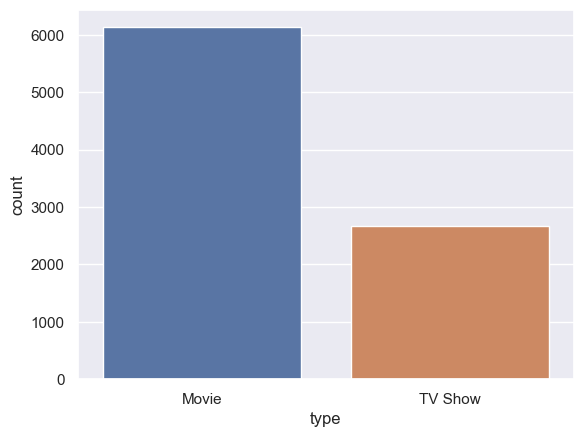

In [293]:
import plotly.express as px
import seaborn as sns

sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=netflix_df, hue='type')

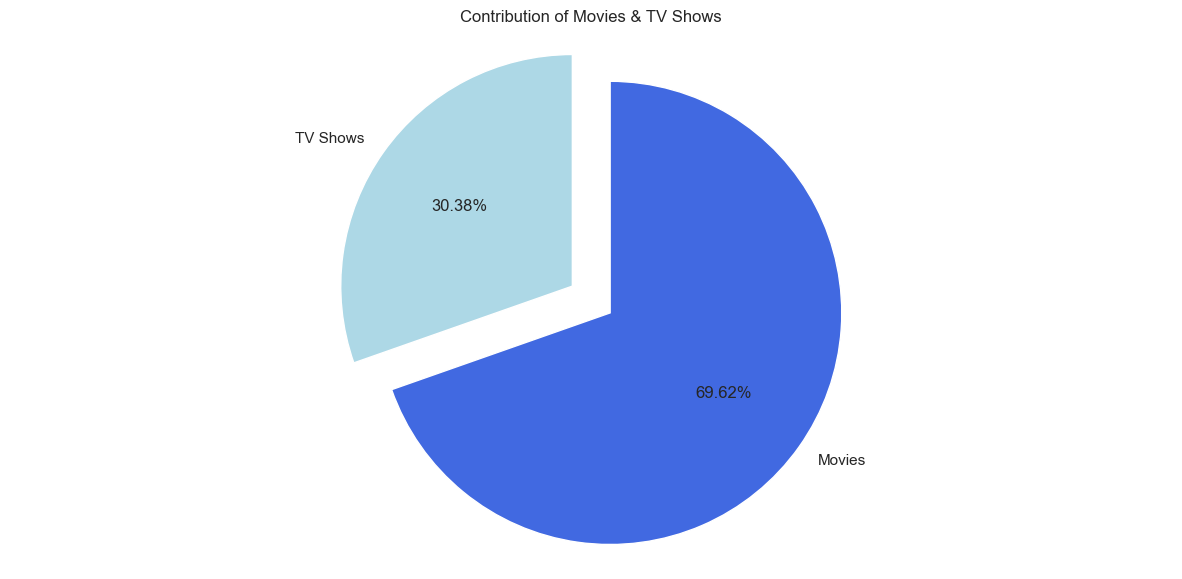

In [299]:


plt.figure(figsize=(15, 7))
labels=['TV Shows', 'Movies']
plt.pie(netflix_df['type'].value_counts().sort_values(),
        labels=labels,explode=[0.1,0.1],
        autopct='%1.2f%%',
        colors=['lightblue','royalblue'], startangle = 90)

plt.title('Contribution of Movies & TV Shows')
plt.axis('equal')
plt.show()



Text(0.5, 1.0, 'Most of Top 7 shows are released based on rating')

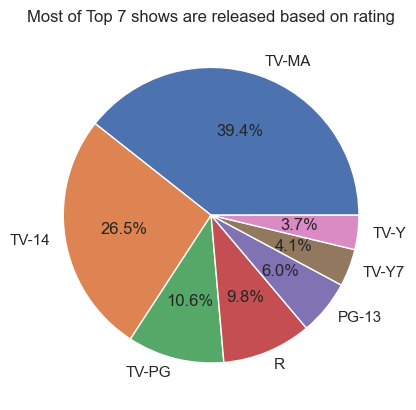

In [295]:
plt.pie(netflix_df['rating'].value_counts().head(7),
        labels=netflix_df['rating'].value_counts().head(7).index,
        autopct='%1.1f%%')
plt.title('Most of Top 7 shows are released based on rating')




    TV-MA - Mature content
    TV-14 - Content for ages 14 and up
    TV-PG - Content for very young audiences including children for ages 2-6years
    R - Restricted for ages under 17
    PG-13 - Parental guidance for children under 13



In [13]:
import plotly.express as px
import seaborn as sns

px.histogram(netflix_df_processed, x="country", color="type").update_xaxes(categoryorder="total descending")



C:\Users\201026268\.conda\envs\mlenv\lib\site-packages\plotly\express\_core.py:1971: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers
C:\Users\201026268\.conda\envs\mlenv\lib\site-packages\plotly\express\_core.py:1992: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [298]:

px.histogram(netflix_df_processed, x="release_year")




Text(0, 0.5, 'Number of shows')

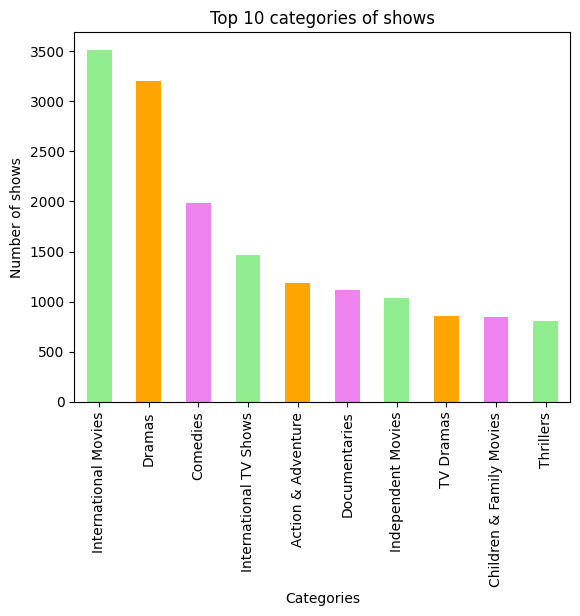

In [16]:
netflix_df_processed['Genre'].value_counts().head(10).plot(kind='bar',
                                                           title='Top 10 categories of shows',
                                                           color=['lightgreen','orange','violet'])
plt.xlabel('Categories')
plt.ylabel('Number of shows')



### save Final dataset

In [18]:
netflix_df_processed.to_csv('data/data_netflix_cleaned.csv')  #, index=False)

# Concat the 3 datasets

In [28]:
import pandas as pd 


dfs = pd.concat([pd.read_csv('data/data_netflix_cleaned.csv') ,pd.read_csv('data/data_disney_cleaned.csv') ,
                 pd.read_csv('data/data_amazon_cleaned.csv') ],
                ignore_index=True)

In [55]:
dfs['title'] = dfs['title'].str.replace('\n', ' ')
dfs['description'] = dfs['description'].str.replace('\n', ' ')
dfs['Platform'] = dfs['Platform'].astype('category')
dfs['Genre'] = dfs['Genre'].astype('category')

In [12]:
dfs

,show_id,type,title,country,date_added,release_year,rating,duration,Genre,description,Platform
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,International TV Shows,"After crossing paths at a party, a Cape Town t...",Netflix
2,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,TV Dramas,"After crossing paths at a party, a Cape Town t...",Netflix
3,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Netflix
4,s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,450,Crime TV Shows,To protect his family from a powerful drug lor...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...
47126,s9667,TV Show,Maradona: Blessed Dream,United States,2021-03-30,2021,TV-MA,450,Drama,"The series tells the story of Diego Maradona, ...",Amazon
47127,s9667,TV Show,Maradona: Blessed Dream,United States,2021-03-30,2021,TV-MA,450,Sports,"The series tells the story of Diego Maradona, ...",Amazon
47128,s9668,Movie,Harry Brown,United States,2021-03-30,2010,R,103,Action,"Harry Brown, starring two-time Academy Award w...",Amazon
47129,s9668,Movie,Harry Brown,United States,2021-03-30,2010,R,103,Drama,"Harry Brown, starring two-time Academy Award w...",Amazon


In [56]:
dfs.to_csv('data/data_cleaned.csv',  index=False)

In [5]:
df1 = pd.read_csv('data/data_netflix_cleaned.csv') 
# df1['Platform'] = 'Netflix'
df1()

,show_id,type,title,country,date_added,release_year,rating,duration,Genre,description,Platform
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,International TV Shows,"After crossing paths at a party, a Cape Town t...",Netflix
2,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,TV Dramas,"After crossing paths at a party, a Cape Town t...",Netflix
3,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Netflix
4,s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,450,Crime TV Shows,To protect his family from a powerful drug lor...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...
23758,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88,Children & Family Movies,"Dragged from civilian life, a former superhero...",Netflix
23759,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88,Comedies,"Dragged from civilian life, a former superhero...",Netflix
23760,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Netflix
23761,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Netflix


In [32]:
dfs.Platform.unique()

['Netflix', 'Disney', 'Amazon']
Categories (3, object): ['Amazon', 'Disney', 'Netflix']

In [54]:
x = dfs[dfs["description"].str.contains("Peek-a-Boo")]
# dfs[dfs["description"].str.startswith("However")]

x.iloc[0].description
# x

"When Iori Kitahara heads off to college, he decides to live at his uncle's dive shop in Izu named Grand Blue.\nIori is looking forward to experiencing college life amidst the roar of the waves, the blazing sun, and his cute cousin who lives with him!\nHowever, Iori runs into a group of tough guys playing strip rock-paper-scissors, and ends up joining Peek-a-Boo, the college's diving club!"

In [21]:
dfs[dfs['show_id']=='s8420']

,show_id,type,title,country,date_added,release_year,rating,duration,Genre,description,Platform
22682,s8420,Movie,The Memphis Belle: A Story of a\nFlying Fortress,United States,2017-03-31,1944,TV-PG,40,Classic Movies,This documentary centers on the crew of the B-...,Netflix
22683,s8420,Movie,The Memphis Belle: A Story of a\nFlying Fortress,United States,2017-03-31,1944,TV-PG,40,Documentaries,This documentary centers on the crew of the B-...,Netflix
44782,s8420,Movie,Thamizh,United States,2021-03-30,2002,18+,155,Action,"Thamizh, a brave youth, looks forward to worki...",Amazon
44783,s8420,Movie,Thamizh,United States,2021-03-30,2002,18+,155,Drama,"Thamizh, a brave youth, looks forward to worki...",Amazon


In [29]:
i= 33014  # 22685  33014
dfs.loc[i-5: i+5]

,show_id,type,title,country,date_added,release_year,rating,duration,Genre,description,Platform
33009,s2305,TV Show,Gown and Out in Beverly Hills,United States,2021-03-30,2020,18+,900,Unscripted,Gown and Out in Beverly Hills is as revealing ...,Amazon
33010,s2306,TV Show,Gortimer Gibbon's Life on Normal Street,United States,2021-03-30,2016,7+,1350,Kids,"As the series comes to a close, Gortimer, Mel ...",Amazon
33011,s2307,Movie,Gorgeous Aerial Views,United States,2021-03-30,2019,ALL,60,Documentary,Spectacular aerial nature video from around th...,Amazon
33012,s2307,Movie,Gorgeous Aerial Views,United States,2021-03-30,2019,ALL,60,Special Interest,Spectacular aerial nature video from around th...,Amazon
33013,s2308,Movie,Gook,United States,2021-03-30,2017,18+,95,Drama,In a predominantly African-American community ...,Amazon
33014,s2308,Movie,Gook,United States,2021-03-30,2017,18+,95,Young Adult Audience,In a predominantly African-American community ...,Amazon
33015,s2309,TV Show,GooGoo: Learn Colors and vehicles with Funny Baby,United States,2021-03-30,2018,ALL,900,Kids,GooGoo and GaaGaa are two 18 month old cute an...,Amazon
33016,s2310,Movie,Goodbye World,United States,2021-03-30,2014,13+,101,Comedy,When a mysterious terrorist attack causes chao...,Amazon
33017,s2310,Movie,Goodbye World,United States,2021-03-30,2014,13+,101,Drama,When a mysterious terrorist attack causes chao...,Amazon
33018,s2311,Movie,Goodachari,India,2021-03-30,2018,18+,142,International,After being trained in an ultra competitive se...,Amazon


In [7]:
df1[df1['show_id']==22685]

,show_id,type,title,country,date_added,release_year,rating,duration,Genre,description,Platform


In [3]:
# df1 = pd.read_csv('data/data_disney_cleaned.csv') 
# df1['Platform'] = 'Disney'
df1

,show_id,type,title,country,date_added,release_year,rating,duration,Genre,description,Platform
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",Netflix
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,International TV Shows,"After crossing paths at a party, a Cape Town t...",Netflix
2,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,TV Dramas,"After crossing paths at a party, a Cape Town t...",Netflix
3,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,900,TV Mysteries,"After crossing paths at a party, a Cape Town t...",Netflix
4,s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,450,Crime TV Shows,To protect his family from a powerful drug lor...,Netflix
...,...,...,...,...,...,...,...,...,...,...,...
23758,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88,Children & Family Movies,"Dragged from civilian life, a former superhero...",Netflix
23759,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88,Comedies,"Dragged from civilian life, a former superhero...",Netflix
23760,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...,Netflix
23761,s8807,Movie,Zubaan,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...,Netflix


In [4]:
df1 = pd.read_csv('data/data_amazon_cleaned.csv') 
# df1['Platform'] = 'Amazon'
df1

,show_id,type,title,country,date_added,release_year,rating,duration,Genre,description,Platform
0,s1,Movie,The Grand Seduction,Canada,2021-03-30,2014,13+,113,Comedy,A small fishing village must procure a local d...,Amazon
1,s1,Movie,The Grand Seduction,Canada,2021-03-30,2014,13+,113,Drama,A small fishing village must procure a local d...,Amazon
2,s2,Movie,Take Care Good Night,India,2021-03-30,2018,13+,110,Drama,A Metro Family decides to fight a Cyber Crimin...,Amazon
3,s2,Movie,Take Care Good Night,India,2021-03-30,2018,13+,110,International,A Metro Family decides to fight a Cyber Crimin...,Amazon
4,s3,Movie,Secrets of Deception,United States,2021-03-30,2017,13+,74,Action,After a man discovers his wife is cheating on ...,Amazon
...,...,...,...,...,...,...,...,...,...,...,...
18630,s9667,TV Show,Maradona: Blessed Dream,United States,2021-03-30,2021,TV-MA,450,Drama,"The series tells the story of Diego Maradona, ...",Amazon
18631,s9667,TV Show,Maradona: Blessed Dream,United States,2021-03-30,2021,TV-MA,450,Sports,"The series tells the story of Diego Maradona, ...",Amazon
18632,s9668,Movie,Harry Brown,United States,2021-03-30,2010,R,103,Action,"Harry Brown, starring two-time Academy Award w...",Amazon
18633,s9668,Movie,Harry Brown,United States,2021-03-30,2010,R,103,Drama,"Harry Brown, starring two-time Academy Award w...",Amazon


In [23]:
# df1.to_csv('data/data_amazon_cleaned.csv',  index=False)